<a href="https://colab.research.google.com/github/traptisinghh/Projects/blob/main/spam_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd

In [16]:
df= pd.read_csv('/content/spam.csv', encoding='latin-1')

In [17]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
971,ham,"Haha awesome, omw back now then",NaN,NaN,NaN
1963,ham,Yes :)it completely in out of form:)clark also...,NaN,NaN,NaN
1671,ham,Glad to see your reply.,NaN,NaN,NaN
22,ham,So Ì_ pay first lar... Then when is da stock c...,NaN,NaN,NaN
2164,ham,"Nothing really, just making sure everybody's u...",NaN,NaN,NaN


In [18]:
df.shape

(5572, 5)

In [19]:
#data cleaning
#EDA
#text preprocessing
#model building
#eveluation
#improvements
#convert to website
#deploy website

In [20]:
#**Data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [21]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [22]:
df.sample(5)

,v1,v2
2741,spam,I don't know u and u don't know me. Send CHAT ...
71,ham,Finished class where are you.
3777,ham,Once a fishrman woke early in d mrng. It was v...
481,ham,"Yo carlos, a few friends are already asking me..."
3089,ham,Am going to take bath ill place the key in win...


In [23]:
df.rename(columns={"v1":"target","v2":"text"}, inplace=True)

In [24]:
df.sample(5)

,target,text
4947,spam,"Hi this is Amy, we will be sending you a free ..."
42,spam,07732584351 - Rodger Burns - MSG = We tried to...
5263,ham,Pls speak with me. I wont ask anything other t...
5439,ham,Hey i've booked the 2 lessons on sun liao...
923,ham,She went to attend another two rounds today..b...


In [25]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [26]:
df['target']= encoder.fit_transform(df['target'])

In [27]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
#missing value
df.isnull().sum()

,0
target,0
text,0


In [29]:
#check for duplicate value
df.duplicated().sum()

np.int64(403)

In [30]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [31]:
df.duplicated().sum()

np.int64(0)

In [32]:
df.shape

(5169, 2)

In [33]:
#**EDA**

In [34]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
df["target"].value_counts()

,count
target,
0,4516
1,653


In [36]:
#spam 653, ham 4516

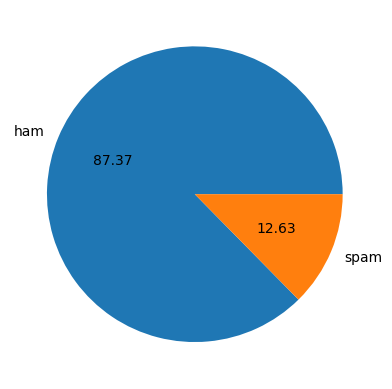

In [37]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [38]:
#data in imbalanced


In [39]:
import nltk

In [40]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [41]:
!pip install nltk

In [42]:
df = df.copy()
df['num characters'] = df['text'].apply(len)

In [43]:
df.head()

,target,text,num characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [47]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [45]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [46]:
df.head()

,target,text,num characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [48]:
df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [49]:
df.head()

,target,text,num characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [50]:
df[['num characters', 'num_words', 'num_sent']].describe()

,num characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [51]:
#ham
df[df['target']==0][['num characters', 'num_words', 'num_sent']].describe()

,num characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [52]:
#spam
df[df['target']==1][['num characters', 'num_words', 'num_sent']].describe()

,num characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [53]:
import seaborn as sns

In [54]:
df[df['target']==0]['num characters']

,num characters
0,111
1,29
3,49
4,61
6,77
...,...
5565,12
5568,37
5569,57
5570,125


<Axes: xlabel='num characters', ylabel='Count'>

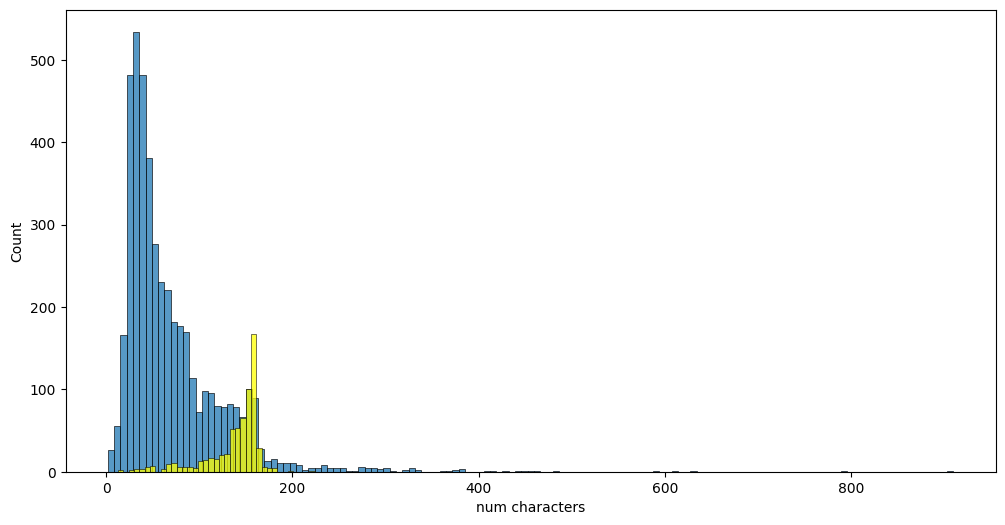

In [55]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num characters'])
sns.histplot(df[df['target']==1]['num characters'],color="yellow")

<Axes: xlabel='num_words', ylabel='Count'>

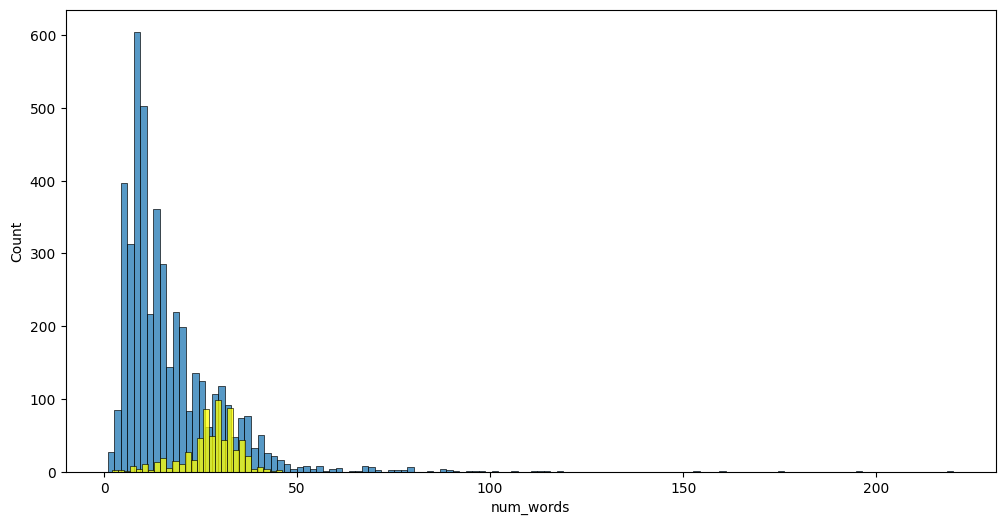

In [56]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color="yellow")

<Axes: xlabel='num_sent', ylabel='Count'>

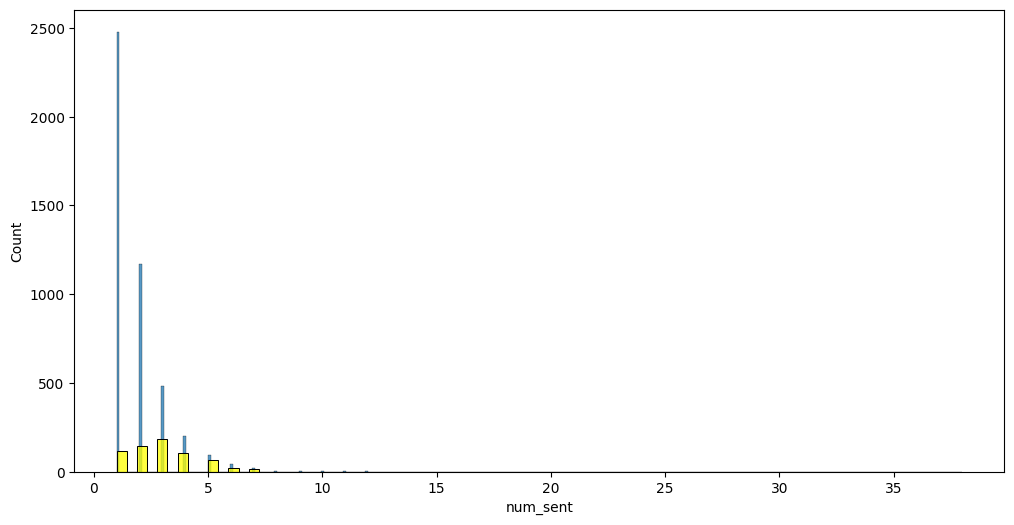

In [57]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sent'])
sns.histplot(df[df['target']==1]['num_sent'],color="yellow")

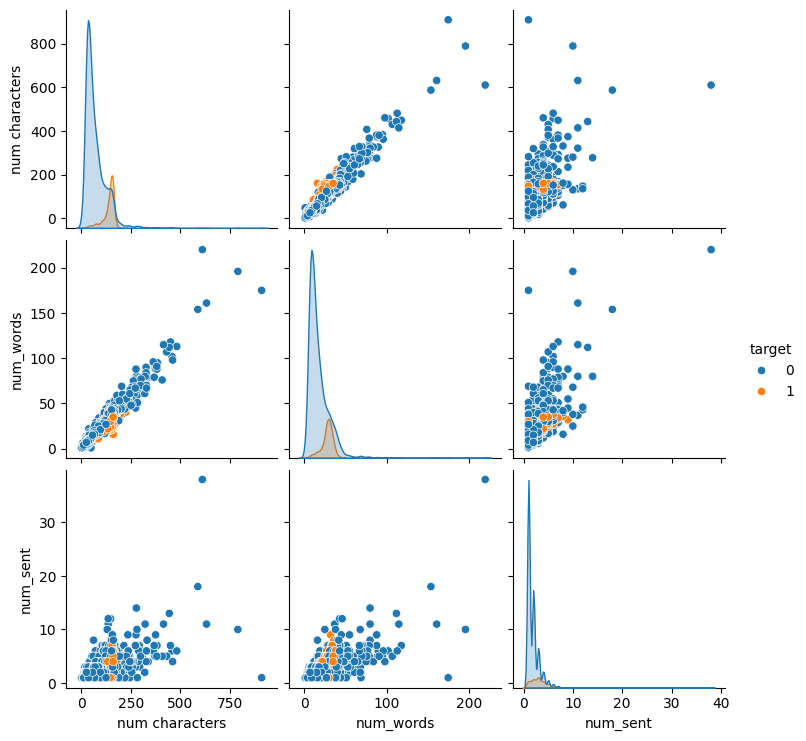

In [58]:
sns.pairplot(df,hue='target')

In [59]:
df[['target', 'num characters', 'num_words', 'num_sent']].corr()

,target,num characters,num_words,num_sent
target,1.000000,0.384717,0.262912,0.263939
num characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sent,0.263939,0.624139,0.679971,1.000000


<Axes: >

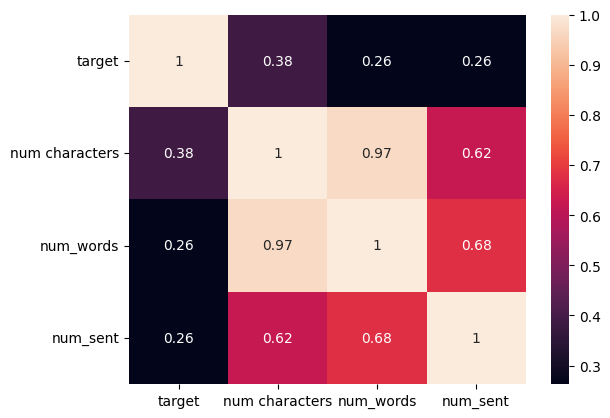

In [60]:
sns.heatmap(df[['target', 'num characters', 'num_words', 'num_sent']].corr(),annot=True)

In [61]:
#target n num character have .38, data preprocessing done on target n num character

In [62]:
# ** Data preprocessing - Lowercase, Tokenization, removing special character, removing stopword and punctuatuin, stemming or lemmatizition (consider dance, dancing, danced as common word)

In [71]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  # 1. Removing non-alphanumeric characters
  y1 = []
  for i in text:
    if i.isalnum():
      y1.append(i)

  # 2. Removing stopwords and punctuation
  y2 = []
  for i in y1:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y2.append(i)

  # 3. Stemming
  ps = PorterStemmer()
  y3 = []
  for i in y2:
    y3.append(ps.stem(i))

  return " ".join(y3) # Returning a list of processed words, as suggested by previous test cell output


In [72]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [73]:
df['transformed_text'] = df['text'].apply(transform_text)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [66]:
df.head()

,target,text,num characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [67]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [68]:
from nltk.stem.porter import PorterStemmer

In [69]:
ps = PorterStemmer()
ps.stem('singing')

'sing'

In [74]:
my_list = ['hello', 'world', 'how', 'are', 'you']
result = ' '.join(my_list)
print(result)

hello world how are you


In [84]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height= 500, min_font_size = 10, background_color = 'white')


In [85]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))


In [77]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [82]:
df['transformed_text'] = df['text'].apply(transform_text)


In [79]:
df['transformed_text'] = df['text'].apply(transform_text)


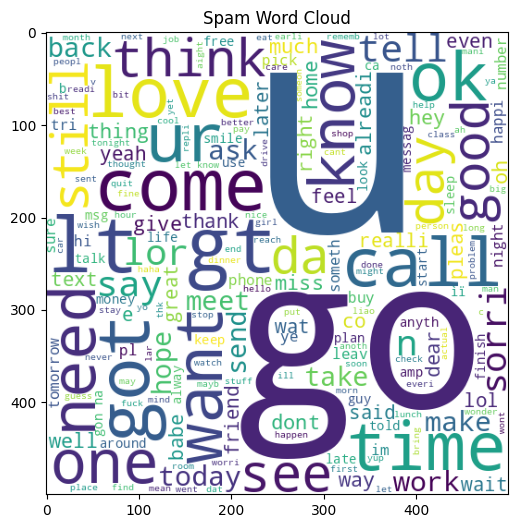

In [87]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.title('Spam Word Cloud')
plt.show()


In [89]:
spam_corpus = []

for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [90]:
len (spam_corpus)


9939

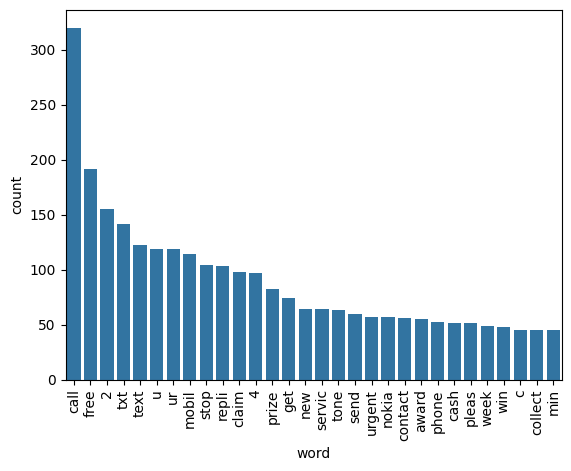

In [91]:
from collections import Counter
spam_word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=spam_word_counts)
plt.xticks(rotation='vertical')
plt.show()


In [92]:
ham_corpus = []

for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)


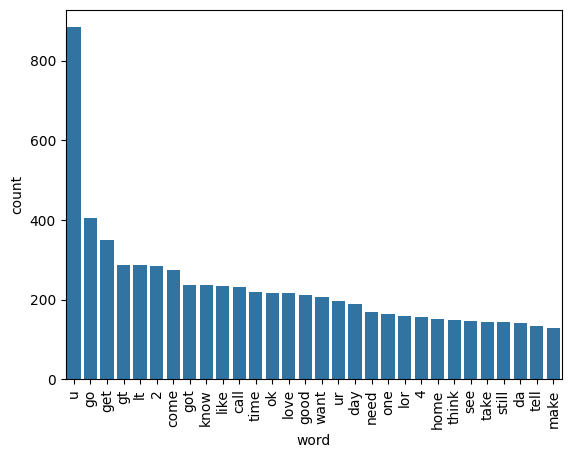

In [93]:
from collections import Counter
ham_word_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=ham_word_counts)
plt.xticks(rotation='vertical')
plt.show()


In [86]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))


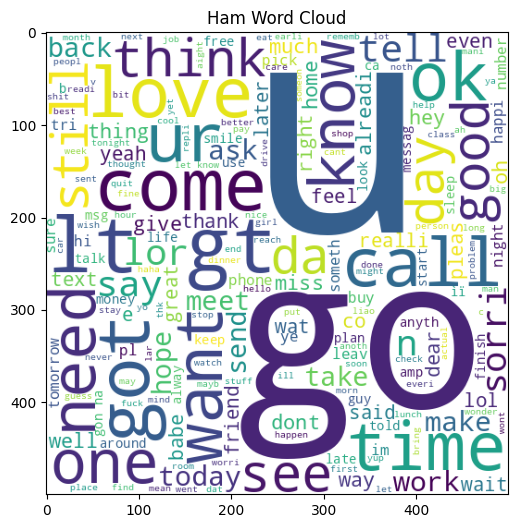

In [88]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.title('Ham Word Cloud')
plt.show()


In [94]:
df.head()

,target,text,num characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [95]:
spam_corpus = []

for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [96]:
len (spam_corpus)

9939

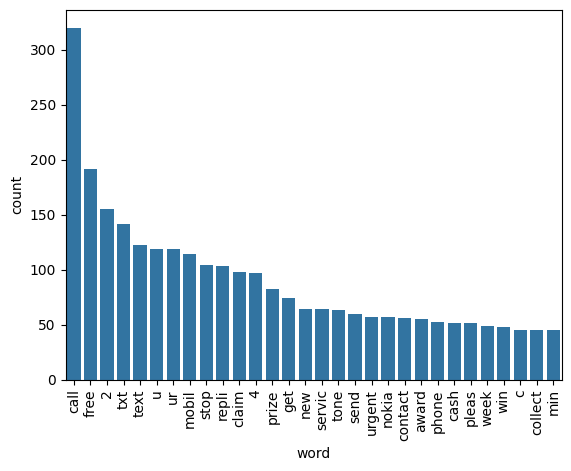

In [97]:
from collections import Counter
spam_word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=spam_word_counts)
plt.xticks(rotation='vertical')
plt.show()

In [98]:
ham_corpus = []

for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

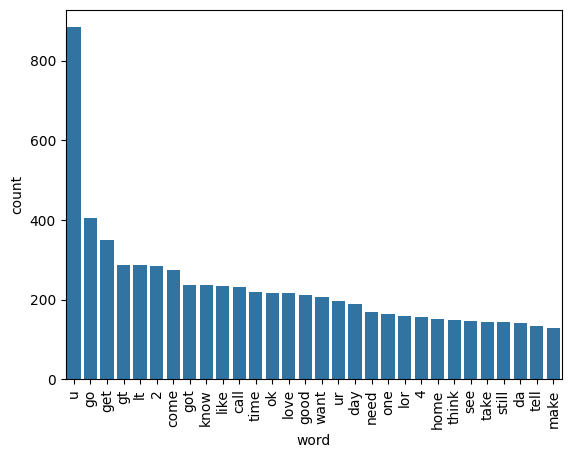

In [99]:
from collections import Counter
ham_word_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=ham_word_counts)
plt.xticks(rotation='vertical')
plt.show()

In [100]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [101]:
len(ham_corpus)

35404

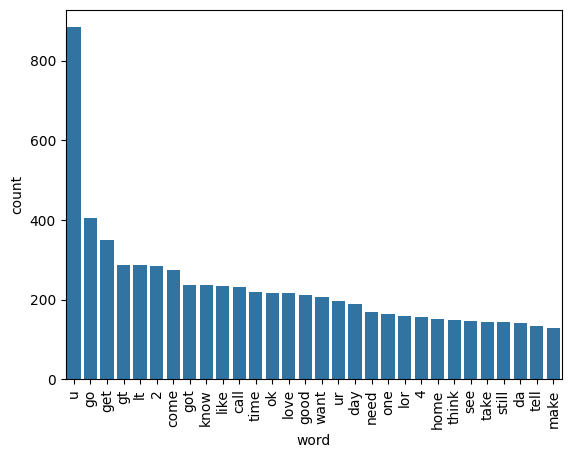

In [138]:
from collections import Counter
ham_word_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=ham_word_counts)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#Model building

In [103]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [124]:
cv = CountVectorizer()
tfidf = TfidfVectorizer()
X= tfidf.fit_transform(df['transformed_text']).toarray()

In [125]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [126]:
X.shape

(5169, 6708)

In [127]:
Y = df['target'].values

In [128]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=2)

In [131]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [117]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [132]:
gnb.fit(X_train, Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred1))
print(confusion_matrix(Y_test, Y_pred1))
print(precision_score(Y_test, Y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [133]:
mnb.fit(X_train, Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred2))
print(confusion_matrix(Y_test, Y_pred2))
print(precision_score(Y_test, Y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [134]:
bnb.fit(X_train, Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred3))
print(confusion_matrix(Y_test, Y_pred3))
print(precision_score(Y_test, Y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
#tfidf+mnb selected

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [137]:
svc = SVC(kernel='sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression (solver='liblinear', penalty = 'l1')

In [141]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [144]:
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [145]:
clfs={
    'SVC':svc,
    "KN":knc,
    "NB":mnb,
    "DT":dtc,
    "LR":lrc,
    "RF":rfc,
    "AdaBoost":abc,
    "BgC":bc,
    "ETC":etc,
    "GBDT":gbdt,
    "xgb":xgb

}

In [146]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
  clf.fit(X_train,Y_train)
  Y_pred=clf.predict(X_test)
  accuracy=accuracy_score(Y_test,Y_pred)
  precision=precision_score(Y_test,Y_pred)
  return accuracy,precision

  return accuracy,precision

In [147]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9729206963249516, 0.9741379310344828)

In [148]:
accuracy_scores=[]
precision_scores=[]

In [ ]:
for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf,X_train,Y_train, X_test, Y_test)
  print("for", name)
  print("accuracy- ",current_accuracy )
  print("precision- ",current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)


for SVC
accuracy-  0.9729206963249516
precision-  0.9741379310344828
for KN
accuracy-  0.9003868471953579
precision-  1.0
for NB
accuracy-  0.9593810444874274
precision-  1.0
for DT
accuracy-  0.9352030947775629
precision-  0.8380952380952381
for LR
accuracy-  0.9516441005802708
precision-  0.94
for RF
accuracy-  0.971953578336557
precision-  1.0
for AdaBoost
accuracy-  0.9245647969052224
precision-  0.8409090909090909
